## Advanced Data Problems

In this chapter, you’ll dive into more advanced data cleaning problems, such as ensuring that weights are all written in kilograms instead of pounds. You’ll also gain invaluable skills that will help you verify that values have been added correctly and that missing values don’t negatively impact your analyses.

### Date uniformity
In this chapter, you work at an asset management company and you'll be working with the accounts dataset, which contains information about each customer, the amount in their account, and the date their account was opened. Your boss has asked you to calculate some summary statistics about the average value of each account and whether the age of the account is associated with a higher or lower account value. Before you can do this, you need to make sure that the accounts dataset you've been given doesn't contain any uniformity problems. In this exercise, you'll investigate the date_opened column and clean it up so that all the dates are in the same format.

In [1]:
library(dplyr)
library(lubridate)

# data
accounts <- readRDS("ch3_1_accounts.rds")

str(accounts)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



'data.frame':	98 obs. of  3 variables:
 $ id         : Factor w/ 100 levels "0128D2D0","02E63545",..: 67 76 13 64 96 84 39 26 35 16 ...
 $ date_opened: chr  "2003-10-19" "October 05, 2018" "2008-07-29" "2005-06-09" ...
 $ total      : num  169305 107460 15297152 14897272 124568 ...


In [2]:
# Check out the accounts data frame
head(accounts)

# Define the date formats
formats <- c("%Y-%m-%d", "%B %d, %Y")

# Convert dates to the same format
accounts %>%
  mutate(date_opened_clean = parse_date_time(accounts$date_opened,orders = formats))

id,date_opened,total
A880C79F,2003-10-19,169305
BE8222DF,"October 05, 2018",107460
19F9E113,2008-07-29,15297152
A2FE52A3,2005-06-09,14897272
F6DC2C08,2012-03-31,124568
D2E55799,2007-06-20,13635752


id,date_opened,total,date_opened_clean
A880C79F,2003-10-19,169305,2003-10-19
BE8222DF,"October 05, 2018",107460,2018-10-05
19F9E113,2008-07-29,15297152,2008-07-29
A2FE52A3,2005-06-09,14897272,2005-06-09
F6DC2C08,2012-03-31,124568,2012-03-31
D2E55799,2007-06-20,13635752,2007-06-20
53AE87EF,"December 01, 2017",15375984,2017-12-01
3E97F253,2019-06-03,14515800,2019-06-03
4AE79EA1,2011-05-07,23338536,2011-05-07
2322DFB4,2018-04-07,189524,2018-04-07


### Visualizing missing data
Dealing with missing data is one of the most common tasks in data science. There are a variety of types of missingness, as well as a variety of types of solutions to missing data.




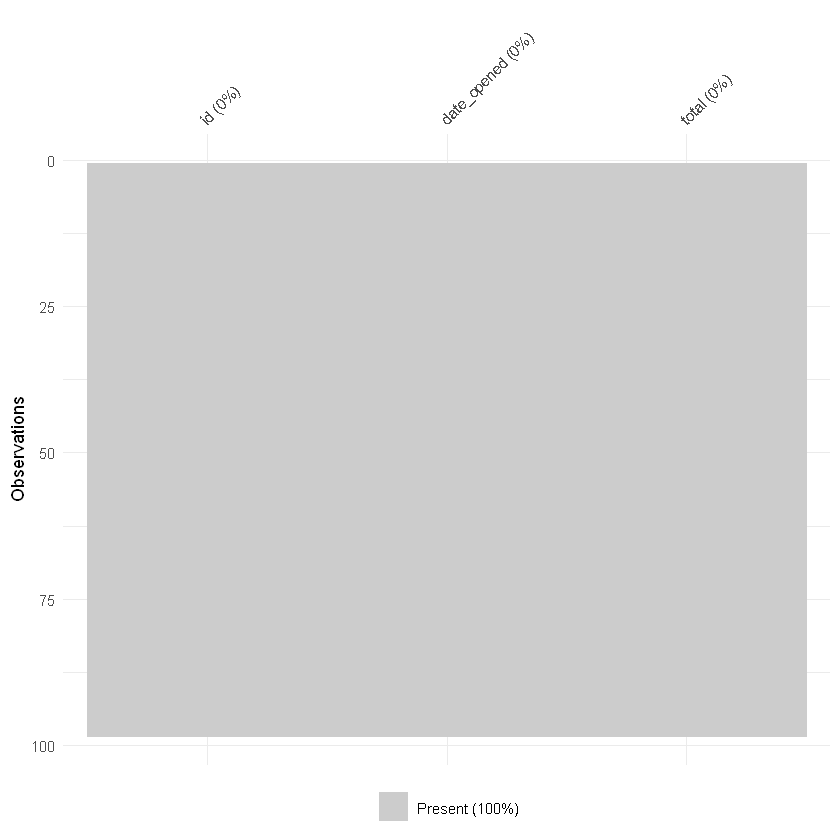

In [6]:
# install.packages("visdat")
library(visdat)
vis_miss(accounts)
# check that there is no missing data

### Treating missing data
In this exercise, you're working with another version of the accounts data that contains missing values for both the cust_id and acct_amount columns.

You want to figure out how many unique customers the bank has, as well as the average amount held by customers. You know that rows with missing cust_id don't really help you, and that on average, the acct_amount is usually 5 times the amount of inv_amount.

In this exercise, you will drop rows of accounts with missing cust_ids, and impute missing values of inv_amount with some domain knowledge. dplyr and assertive are loaded and accounts is available.

In [ ]:
## Do not run

# Create accounts_clean
accounts_clean <- accounts %>%
  # Filter to remove rows with missing cust_id
  filter(!is.na(cust_id)) %>%
  # Add new col acct_amount_filled with replaced NAs
  mutate(acct_amount_filled = ifelse(is.na(acct_amount), inv_amount * 5, acct_amount))

# Assert that cust_id has no missing vals
assert_all_are_not_na(accounts_clean$cust_id)

# Assert that acct_amount_filled has no missing vals
assert_all_are_not_na(accounts_clean$acct_amount_filled)